In [560]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
from sklearn.model_selection import GridSearchCV

In [561]:
train = pd.read_csv("data/train.csv")
submission = pd.read_csv("data/test.csv")

In [562]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [563]:
submission.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [564]:
data = pd.concat([train.assign(ind="train"), submission.assign(ind="submission")])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [575]:
data.isnull().sum()

MSZoning            0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
Foundation          0
BsmtQual            0
TotalBsmtSF         0
Heating             0
Electrical          0
1stFlrSF            0
GrLivArea           0
FullBath            0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageCars          0
GarageArea          0
PavedDrive          0
Fence               0
MiscFeature         0
SaleType            0
SaleCondition       0
SalePrice        1459
ind                 0
dtype: int

In [566]:
fake_nans = ["Alley", "Fence", "MiscFeature", "FireplaceQu","BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtQual", "GarageFinish", "GarageCond", "PoolQC"]

for element in fake_nans:
    data[element].fillna("No", inplace=True)

In [567]:

fill_mode = ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "KitchenQual", "Functional", "GarageType", "GarageQual","MasVnrType", "Electrical", "SaleType"]

fill_mean = ["GarageCars", "GarageArea", "TotalBsmtSF"]

for element in fill_mode:
    data[element].fillna(data[element].mode()[0], inplace=True)
for element in fill_mean:
    data[element].fillna(data[element].mean(), inplace=True)
data = data.round(5)

In [568]:
semi = {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 2, "No" : 0}

bsmnt1 = {"Gd" : 7, "Av" : 5, "Mn" : 2, "No" : 0}
bsmnt2 = {"GLQ" : 9, "ALQ" : 7, "BLQ" : 5, "Rec" : 3, "LwQ" : 2, "No" : 0, "Unf" : 0}

data["BsmtExposure"] = data["BsmtExposure"].map(bsmnt1)
data["BsmtFinType1"] = data["BsmtFinType1"].map(bsmnt2)
data["BsmtFinType2"] = data["BsmtFinType2"].map(bsmnt2)

dades_qualificatives = ["ExterQual", "BsmtQual", "PoolQC", "ExterCond", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]

for element in dades_qualificatives:
    data[element] = data[element].map(semi)

data["CentralAir"] = data["CentralAir"].map({"N" : 0, "Y" : 1})



In [578]:
data.isnull().sum()

MSZoning            0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
Foundation          0
BsmtQual            0
TotalBsmtSF         0
Heating             0
Electrical          0
1stFlrSF            0
GrLivArea           0
FullBath            0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageCars          0
GarageArea          0
PavedDrive          0
Fence               0
MiscFeature         0
SaleType            0
SaleCondition       0
SalePrice        1459
ind                 0
dtype: int

In [570]:
df = data.select_dtypes(include=np.number)
to_drop = []


threshold = 0.5
for feature in [c for c in df.columns if c != 'SalePrice']:
    if abs(df[feature].corr(df['SalePrice'])) < threshold:
        to_drop.append(feature)
print(to_drop)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold']


In [571]:
for col in to_drop:
    data.drop(col, axis=1, inplace=True)

In [572]:
coefficient_corr = data.corr()
print(coefficient_corr["SalePrice"].sort_values(ascending=False))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.604816
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.522173
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [573]:
data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,TotalBsmtSF,Heating,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,ind
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,7,PConc,7,856.0,GasA,SBrkr,856,1710,2,7,8,Typ,0,Attchd,RFn,2.0,548.0,Y,No,No,WD,Normal,208500.0,train
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,5,CBlock,7,1262.0,GasA,SBrkr,1262,1262,2,5,6,Typ,5,Attchd,RFn,2.0,460.0,Y,No,No,WD,Normal,181500.0,train
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,7,PConc,7,920.0,GasA,SBrkr,920,1786,2,7,6,Typ,5,Attchd,RFn,2.0,608.0,Y,No,No,WD,Normal,223500.0,train
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,5,BrkTil,5,756.0,GasA,SBrkr,961,1717,1,7,7,Typ,7,Detchd,Unf,3.0,642.0,Y,No,No,WD,Abnorml,140000.0,train
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,7,PConc,7,1145.0,GasA,SBrkr,1145,2198,2,7,9,Typ,5,Attchd,RFn,3.0,836.0,Y,No,No,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,5,CBlock,5,546.0,GasA,SBrkr,546,1092,1,5,5,Typ,0,Attchd,No,0.0,0.0,Y,No,No,WD,Normal,NaN,submission
1455,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,5,CBlock,5,546.0,GasA,SBrkr,546,1092,1,5,6,Typ,0,CarPort,Unf,1.0,286.0,Y,No,No,WD,Abnorml,NaN,submission
1456,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,5,CBlock,5,1224.0,GasA,SBrkr,1224,1224,1,5,7,Typ,5,Detchd,Unf,2.0,576.0,Y,No,No,WD,Abnorml,NaN,submission
1457,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,5,PConc,7,912.0,GasA,SBrkr,970,970,1,5,6,Typ,0,Attchd,No,0.0,0.0,Y,MnPrv,Shed,WD,Normal,NaN,submission


In [574]:
train = data[data["ind"] == "train"]
submission = data[data["ind"] == "submission"]

sc = StandardScaler()

y = train[["SalePrice"]].values.ravel()
X = train[["OverallQual", "GrLivArea", "ExterQual", "KitchenQual", "GarageCars", "GarageArea", "TotalBsmtSF","BsmtQual", "1stFlrSF", "FullBath","TotRmsAbvGrd", "TotRmsAbvGrd", "YearBuilt", "FireplaceQu", "YearRemodAdd" ]]
x = sc.fit_transform(X)


models = []
names = []
scores = []

models.append(("LinearRegression", LinearRegression()))
models.append(("Lasso", Lasso(alpha=0.1)))   
models.append(("Ridge", Ridge(alpha=20)))
models.append(("DecisionTree", DecisionTreeRegressor()))
models.append(("RandomForest", RandomForestRegressor()))
models.append(("BayesianRidge", BayesianRidge()))
models.append(("SupportVectorRegressor", SVR()))
models.append(("GBR", GradientBoostingRegressor()))


for name, model in models:
    names.append(name)
    score = -cross_val_score(model,x, y, cv=10, scoring="neg_mean_squared_error").mean()
    scores.append(score)
    print(f"{name} : {score}")


LinearRegression : 1404417609.2700448
Lasso : 1404415449.7037919
Ridge : 1396983411.1554441
DecisionTree : 1630934793.322089
RandomForest : 969839115.0461082
BayesianRidge : 1399909415.7350786
SupportVectorRegressor : 6618398914.018568
GBR : 842517372.8430853


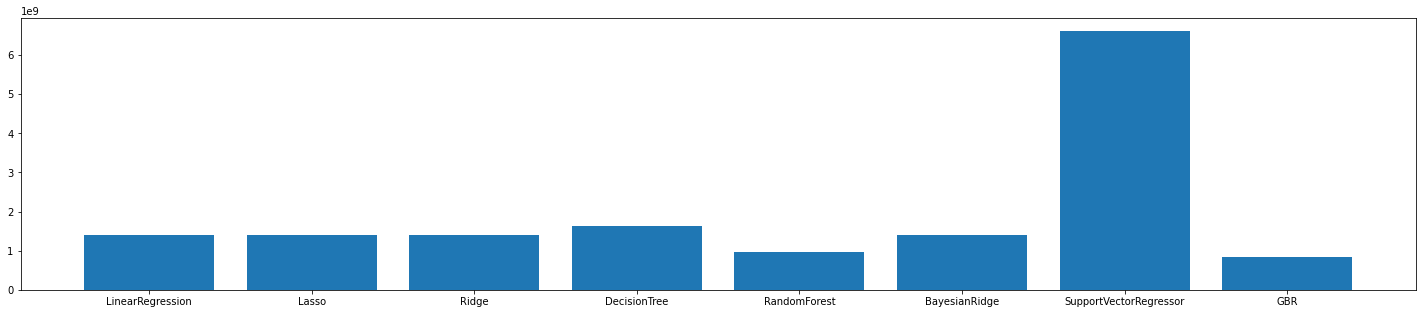

In [576]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [25, 5]
plt.bar(names,scores)
plt.show()

In [577]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh') 

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [512]:
test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuned_model = GridSearchCV(GradientBoostingRegressor(), test1, cv=3, scoring="r2")

tuned_model.fit(X_train, y_train)
tuned_model.best_params_, tuned_model.best_score_


({'learning_rate': 0.1, 'n_estimators': 100}, 0.8257277798114578)

In [513]:
test2 = {'max_depth':[2,3,4,5,6,7], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9] }

tuned_model = GridSearchCV(GradientBoostingRegressor(), test2, cv=4, scoring="r2")

tuned_model.fit(X_train, y_train)
tuned_model.best_params_, tuned_model.best_score_


({'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 100},
 0.8546797701917063)

In [514]:
test3 = {'max_features':[2,3,4,5,6,7], 'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuned_model = GridSearchCV(GradientBoostingRegressor(), test3, cv=4, scoring="r2")

tuned_model.fit(X_train, y_train)
tuned_model.best_params_, tuned_model.best_score_


({'max_features': 5, 'subsample': 1}, 0.8478502798716216)

In [540]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=4, min_samples_leaf=3, min_samples_split=100, max_features=5, subsample=1)
model.fit(X_train,y_train)


score = model.score(X_test, y_test)
print(score)

0.8338698417552568


In [ ]:
joblib.dump(model, "GradientBoostingRegressor.pkl")

In [ ]:
predictions = model.predict(submission)
id_sol = submission["Id"]

solution = pd.DataFrame({"id":id_sol, "SalePrice":predictions})
solution.to_csv("submission.csv", index = False)